In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
import seaborn as sns
sns.set_context("talk")
cmap = ['#9B1D20','#03254E','#B4B8AB']
sns.set_palette(cmap, n_colors=3, desat=None, color_codes=False)
import os 
import glob
import statsmodels.api as sm
from pathlib import Path
from scipy import stats
import pingouin as pg
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
import venn
from venn import venn

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=24, edges='horizontal',
                     header_color='#fff', row_colors=['w', '#eee'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, 
                         bbox=bbox, 
                         colLabels=data.columns,
                         #edges=edges,
                         **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

/Users/davidhaggerty/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/davidhaggerty/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# M1

In [7]:
df = pd.read_excel('M1set_Global_treatmentonly.xlsx', sheet_name='Cleaned')

In [8]:
df

,Accession,Description,"Abundance Ratio: (PME, M1) / (PSE, M1)","Abundance Ratio (log2): (PME, M1) / (PSE, M1)",Negativelog p-value,"Abundance Ratio P-Value: (PME, M1) / (PSE, M1)","Abundance: F3: 126, Sample, M, PME, M1","Abundance: F3: 127C, Sample, M, PME, M1","Abundance: F3: 128N, Sample, M, PME, M1","Abundance: F3: 132C, Sample, M, PME, M1",...,"Abundance: F3: 130N, Sample, F, PME, M1","Abundance: F3: 133N, Sample, F, PME, M1","Abundance: F3: 130C, Sample, M, PSE, M1","Abundance: F3: 131N, Sample, M, PSE, M1","Abundance: F3: 131C, Sample, M, PSE, M1","Abundance: F3: 133C, Sample, M, PSE, M1","Abundance: F3: 129N, Sample, F, PSE, M1","Abundance: F3: 129C, Sample, F, PSE, M1","Abundance: F3: 132N, Sample, F, PSE, M1","Abundance: F3: 134N, Sample, F, PSE, M1"
0,Q9D6J5,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,0.950,-0.07,4.853388,0.000014,6654.5,6009.7,5850.0,5316.9,...,5664.1,5174.5,7074.0,6526.0,5681.9,6382.2,6925.2,6230.5,5951.2,6354.8
1,Q3TL44,NLR family member X1 OS=Mus musculus OX=10090 ...,0.931,-0.10,4.760718,0.000017,699.1,613.2,590.3,563.8,...,586.0,546.1,795.8,681.5,621.9,670.2,719.9,651.0,624.0,663.0
2,Q9CZ42,ATP-dependent (S)-NAD(P)H-hydrate dehydratase ...,0.951,-0.07,4.595414,0.000025,4892.0,4174.6,4399.1,3875.2,...,4051.0,3648.1,5076.0,4581.2,4188.6,4476.8,4996.7,4401.2,4203.7,4446.9
3,Q8BGU5,Cyclin-Y OS=Mus musculus OX=10090 GN=Ccny PE=1...,0.940,-0.09,4.242444,0.000057,1424.9,1236.8,1213.9,1105.8,...,1181.8,1062.9,1500.8,1316.1,1228.8,1346.1,1396.8,1255.6,1234.8,1335.0
4,E9PYJ7,Membrane-associated phosphatidylinositol trans...,0.955,-0.07,4.065152,0.000086,4569.7,4009.4,3936.5,3682.6,...,3829.4,3538.8,4776.9,4462.9,3929.4,4257.4,4574.9,4148.6,3930.8,4271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Q99LD4,COP9 signalosome complex subunit 1 OS=Mus musc...,1.011,0.02,0.000255,0.999414,623.5,470.1,504.3,460.9,...,447.1,422.7,574.1,537.3,483.4,504.0,569.4,476.1,459.8,489.4
5970,Q6PDY2,2-aminoethanethiol dioxygenase OS=Mus musculus...,0.996,-0.01,0.000124,0.999715,2584.0,2140.1,2229.0,1925.7,...,2066.8,1810.1,2469.1,2215.1,1999.9,2177.6,2376.0,2182.5,2075.8,2218.6
5971,Q5QGU0,Receptor expression-enhancing protein OS=Mus m...,1.011,0.02,0.000098,0.999773,3670.4,3115.4,2986.6,2702.8,...,2943.8,2699.3,3283.4,3153.0,2800.4,3187.3,3413.1,3125.5,2976.2,3010.8
5972,Q9EQY9,MS4A9 OS=Mus musculus OX=10090 GN=Ms4a4c PE=2 ...,0.977,-0.03,0.000087,0.999800,260.1,214.3,210.8,178.0,...,178.8,180.8,237.1,221.0,206.9,217.0,246.3,220.6,144.7,221.0


In [9]:
## Make a volcano plot

df.loc[df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] >= 0.05, 'Sig'] = "Non-Significant"
df.loc[(df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] <= 0), 'Sig'] = "Down-Regulated"
df.loc[(df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] > 0), 'Sig'] = "Up-Regulated"

df

,Accession,Description,"Abundance Ratio: (PME, M1) / (PSE, M1)","Abundance Ratio (log2): (PME, M1) / (PSE, M1)",Negativelog p-value,"Abundance Ratio P-Value: (PME, M1) / (PSE, M1)","Abundance: F3: 126, Sample, M, PME, M1","Abundance: F3: 127C, Sample, M, PME, M1","Abundance: F3: 128N, Sample, M, PME, M1","Abundance: F3: 132C, Sample, M, PME, M1",...,"Abundance: F3: 133N, Sample, F, PME, M1","Abundance: F3: 130C, Sample, M, PSE, M1","Abundance: F3: 131N, Sample, M, PSE, M1","Abundance: F3: 131C, Sample, M, PSE, M1","Abundance: F3: 133C, Sample, M, PSE, M1","Abundance: F3: 129N, Sample, F, PSE, M1","Abundance: F3: 129C, Sample, F, PSE, M1","Abundance: F3: 132N, Sample, F, PSE, M1","Abundance: F3: 134N, Sample, F, PSE, M1",Sig
0,Q9D6J5,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,0.950,-0.07,4.853388,0.000014,6654.5,6009.7,5850.0,5316.9,...,5174.5,7074.0,6526.0,5681.9,6382.2,6925.2,6230.5,5951.2,6354.8,Down-Regulated
1,Q3TL44,NLR family member X1 OS=Mus musculus OX=10090 ...,0.931,-0.10,4.760718,0.000017,699.1,613.2,590.3,563.8,...,546.1,795.8,681.5,621.9,670.2,719.9,651.0,624.0,663.0,Down-Regulated
2,Q9CZ42,ATP-dependent (S)-NAD(P)H-hydrate dehydratase ...,0.951,-0.07,4.595414,0.000025,4892.0,4174.6,4399.1,3875.2,...,3648.1,5076.0,4581.2,4188.6,4476.8,4996.7,4401.2,4203.7,4446.9,Down-Regulated
3,Q8BGU5,Cyclin-Y OS=Mus musculus OX=10090 GN=Ccny PE=1...,0.940,-0.09,4.242444,0.000057,1424.9,1236.8,1213.9,1105.8,...,1062.9,1500.8,1316.1,1228.8,1346.1,1396.8,1255.6,1234.8,1335.0,Down-Regulated
4,E9PYJ7,Membrane-associated phosphatidylinositol trans...,0.955,-0.07,4.065152,0.000086,4569.7,4009.4,3936.5,3682.6,...,3538.8,4776.9,4462.9,3929.4,4257.4,4574.9,4148.6,3930.8,4271.0,Down-Regulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Q99LD4,COP9 signalosome complex subunit 1 OS=Mus musc...,1.011,0.02,0.000255,0.999414,623.5,470.1,504.3,460.9,...,422.7,574.1,537.3,483.4,504.0,569.4,476.1,459.8,489.4,Non-Significant
5970,Q6PDY2,2-aminoethanethiol dioxygenase OS=Mus musculus...,0.996,-0.01,0.000124,0.999715,2584.0,2140.1,2229.0,1925.7,...,1810.1,2469.1,2215.1,1999.9,2177.6,2376.0,2182.5,2075.8,2218.6,Non-Significant
5971,Q5QGU0,Receptor expression-enhancing protein OS=Mus m...,1.011,0.02,0.000098,0.999773,3670.4,3115.4,2986.6,2702.8,...,2699.3,3283.4,3153.0,2800.4,3187.3,3413.1,3125.5,2976.2,3010.8,Non-Significant
5972,Q9EQY9,MS4A9 OS=Mus musculus OX=10090 GN=Ms4a4c PE=2 ...,0.977,-0.03,0.000087,0.999800,260.1,214.3,210.8,178.0,...,180.8,237.1,221.0,206.9,217.0,246.3,220.6,144.7,221.0,Non-Significant


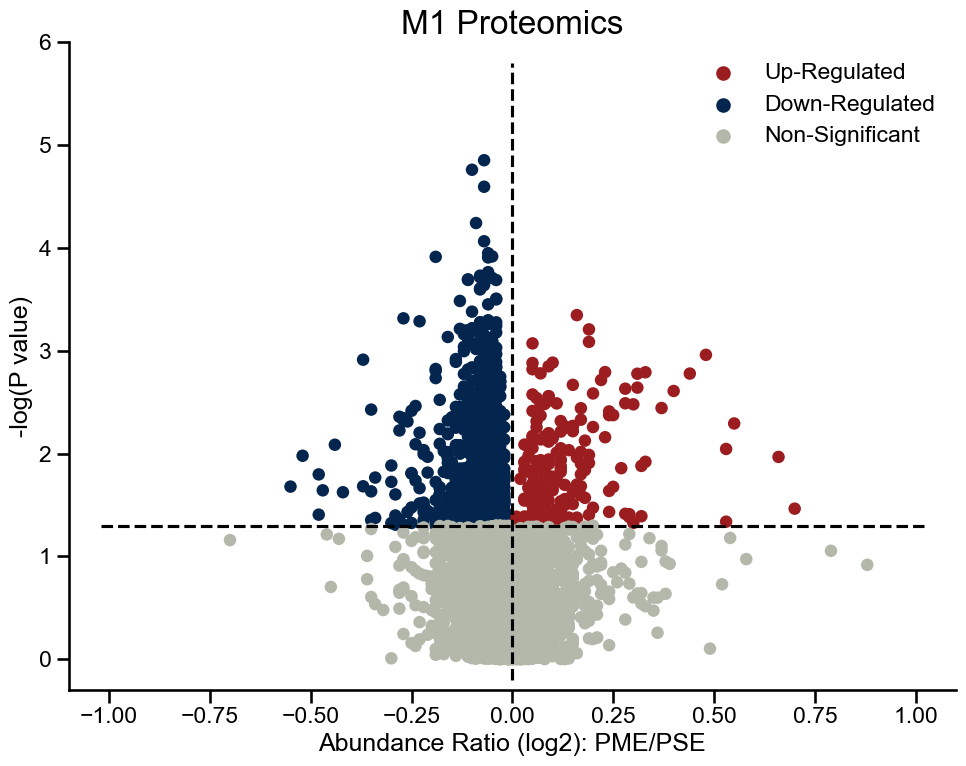

<Figure size 640x480 with 0 Axes>

In [16]:
## Make a volcano plot

df.loc[df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] >= 0.05, 'Sig'] = "Non-Significant"
df.loc[(df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] <= 0), 'Sig'] = "Down-Regulated"
df.loc[(df['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = df, y = 'Negativelog p-value', x = 'Abundance Ratio (log2): (PME, M1) / (PSE, M1)',
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("M1 Proteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 6)
plt.xlim(-1.1,1.1)

plt.vlines(x = 0, ymin = -0.2, ymax = 5.8, colors='Black', linestyles='dashed')
plt.hlines(y = (df.loc[df['Sig'] == "Non-Significant", 'Negativelog p-value'].max()),
           xmin = -1.02, xmax = 1.02, colors='Black', linestyles='dashed')


#plt.savefig('M1_Volcano_Protein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [17]:
df.shape

(5974, 23)

In [18]:
len(df.loc[df['Sig'] != "Non-Significant"])

1248

In [19]:
print(len(df.loc[df['Sig'] == "Up-Regulated"]))
print(len(df.loc[df['Sig'] == "Down-Regulated"]))

200
1048


In [ ]:
df_phos = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Msets_PhosphopeptideSummary.xlsx', sheet_name='Cleaned')

In [ ]:
## Make a volcano plot

df_phos.loc[df_phos['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] >= 0.05, 'Sig'] = "Non-Significant"
df_phos.loc[(df_phos['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df_phos['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] <= 0), 'Sig'] = "Down-Regulated"
df_phos.loc[(df_phos['Abundance Ratio P-Value: (PME, M1) / (PSE, M1)'] < 0.05) & (df_phos['Abundance Ratio (log2): (PME, M1) / (PSE, M1)'] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = df_phos, y = 'Negativelog p-value', x = 'Abundance Ratio (log2): (PME, M1) / (PSE, M1)',
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("M1 Phosphopeptide", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 6)
plt.xlim(-1.1,2.1)

plt.vlines(x = 0, ymin = -0.2, ymax = 5.8, colors='Black', linestyles='dashed')
plt.hlines(y = (df_phos.loc[df_phos['Sig'] == "Non-Significant", 'Negativelog p-value'].max()),
           xmin = -1.02, xmax = 2.02, colors='Black', linestyles='dashed')


#plt.savefig('M1_Volcano__Phos_Protein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
df_phos.shape

In [ ]:
len(df_phos[df_phos['Sig'] != "Non-Significant"])

In [ ]:
print(len(df_phos.loc[df_phos['Sig'] == "Up-Regulated"]))
print(len(df_phos.loc[df_phos['Sig'] == "Down-Regulated"]))

## Heatmaps

In [26]:
hm = pd.read_excel('M1set_Global_treatmentonly.xlsx', sheet_name='Heat Map Pivot')
hm.head()

,ID,Sex,Exposure,Adra2a,Hbb-b2,Plp1,Mobp,Wdr24,Cldn11,Cnp,...,Recql4,Uprt,Commd3,Dhrs11,Atg10,Il12rb2,Smg5,Ncapg,Cyp2e1,Bms1
0,PME Male - 1,Male,PME,0.508005,2.276207,2.426947,2.295265,0.784799,3.002066,2.485426,...,-0.298815,-0.185733,-1.467075,-1.284910,0.137063,-0.856474,0.297133,0.827748,-1.162451,-0.909707
1,PME Male - 2,Male,PME,0.347053,0.641502,0.154264,0.290211,0.273065,0.292030,0.126379,...,0.069649,-1.057380,-1.664619,-1.724246,0.249525,-1.942947,1.309586,0.358473,-1.399831,-0.497722
2,PME Male - 3,Male,PME,-0.028502,0.788059,1.546289,1.291045,1.711712,1.023271,1.441733,...,0.096609,-0.802209,-1.404004,-1.398772,-0.931327,-1.732662,-1.111497,-0.671323,-1.312903,-0.450702
3,PME Male - 4,Male,PME,0.668957,-0.495348,-0.094431,-0.396842,-0.448672,-0.137608,-0.237482,...,-0.316789,-0.779627,0.175156,0.049210,-0.762634,0.101492,-1.463655,-0.775606,-0.336636,-0.083498
4,PME Female - 1,Female,PME,0.051974,2.344712,0.604233,1.123569,2.930700,0.660116,1.004042,...,-1.763681,-0.768336,-1.561087,-1.666241,-0.762634,-1.358822,0.209094,-0.840783,-1.887964,-1.835926


In [34]:
hm.groupby(["ID"]).median().T

ID,PME Female - 1,PME Female - 2,PME Female - 3,PME Female - 4,PME Male - 1,PME Male - 2,PME Male - 3,PME Male - 4,PSE Female - 1,PSE Female - 2,PSE Female - 3,PSE Female - 4,PSE Male - 1,PSE Male - 2,PSE Male - 3,PSE Male - 4
Adra2a,0.051974,1.285940,0.400704,0.668957,0.508005,0.347053,-0.028502,0.668957,-1.181992,-1.852625,-0.484533,1.232289,1.017687,-1.530721,-1.369769,0.266577
Hbb-b2,2.344712,-0.196557,-0.561660,-0.543727,2.276207,0.641502,0.788059,-0.495348,-0.404524,-0.614942,-0.723182,-0.341179,-0.399750,-0.547339,-0.665901,-0.556370
Plp1,0.604233,0.663416,0.418866,-1.082313,2.426947,0.154264,1.546289,-0.094431,-0.639810,-0.452396,-0.140089,0.159482,-0.465870,-1.367537,-1.246051,-0.484999
Mobp,1.123569,0.643584,0.088859,-1.054255,2.295265,0.290211,1.291045,-0.396842,-0.968929,-0.773505,0.643160,-0.080522,-0.304106,-1.167952,-1.192724,-0.436859
Wdr24,2.930700,-0.518673,-0.448672,-0.639365,0.784799,0.273065,1.711712,-0.448672,-0.359360,-0.426947,-0.443844,-0.511432,-0.371429,-0.588675,-0.397981,-0.545225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Il12rb2,-1.358822,-0.167206,0.288412,-0.027016,-0.856474,-1.942947,-1.732662,0.101492,1.538440,1.141235,0.673935,0.183269,0.825807,0.685617,0.358507,0.288412
Smg5,0.209094,-0.759340,-0.803360,-2.167970,0.297133,1.309586,-1.111497,-1.463655,1.353606,0.297133,1.001448,0.341153,0.165074,0.385172,0.781350,0.165074
Ncapg,-0.840783,-0.788642,-0.892925,-1.270951,0.827748,0.358473,-0.671323,-0.775606,1.870580,0.632217,-1.557730,-0.280261,1.088456,0.866854,0.827748,0.606146
Cyp2e1,-1.887964,0.743275,-0.226305,-0.413534,-1.162451,-1.399831,-1.312903,-0.336636,1.197975,0.759992,-0.032389,0.579449,0.950565,0.960595,0.579449,1.000715


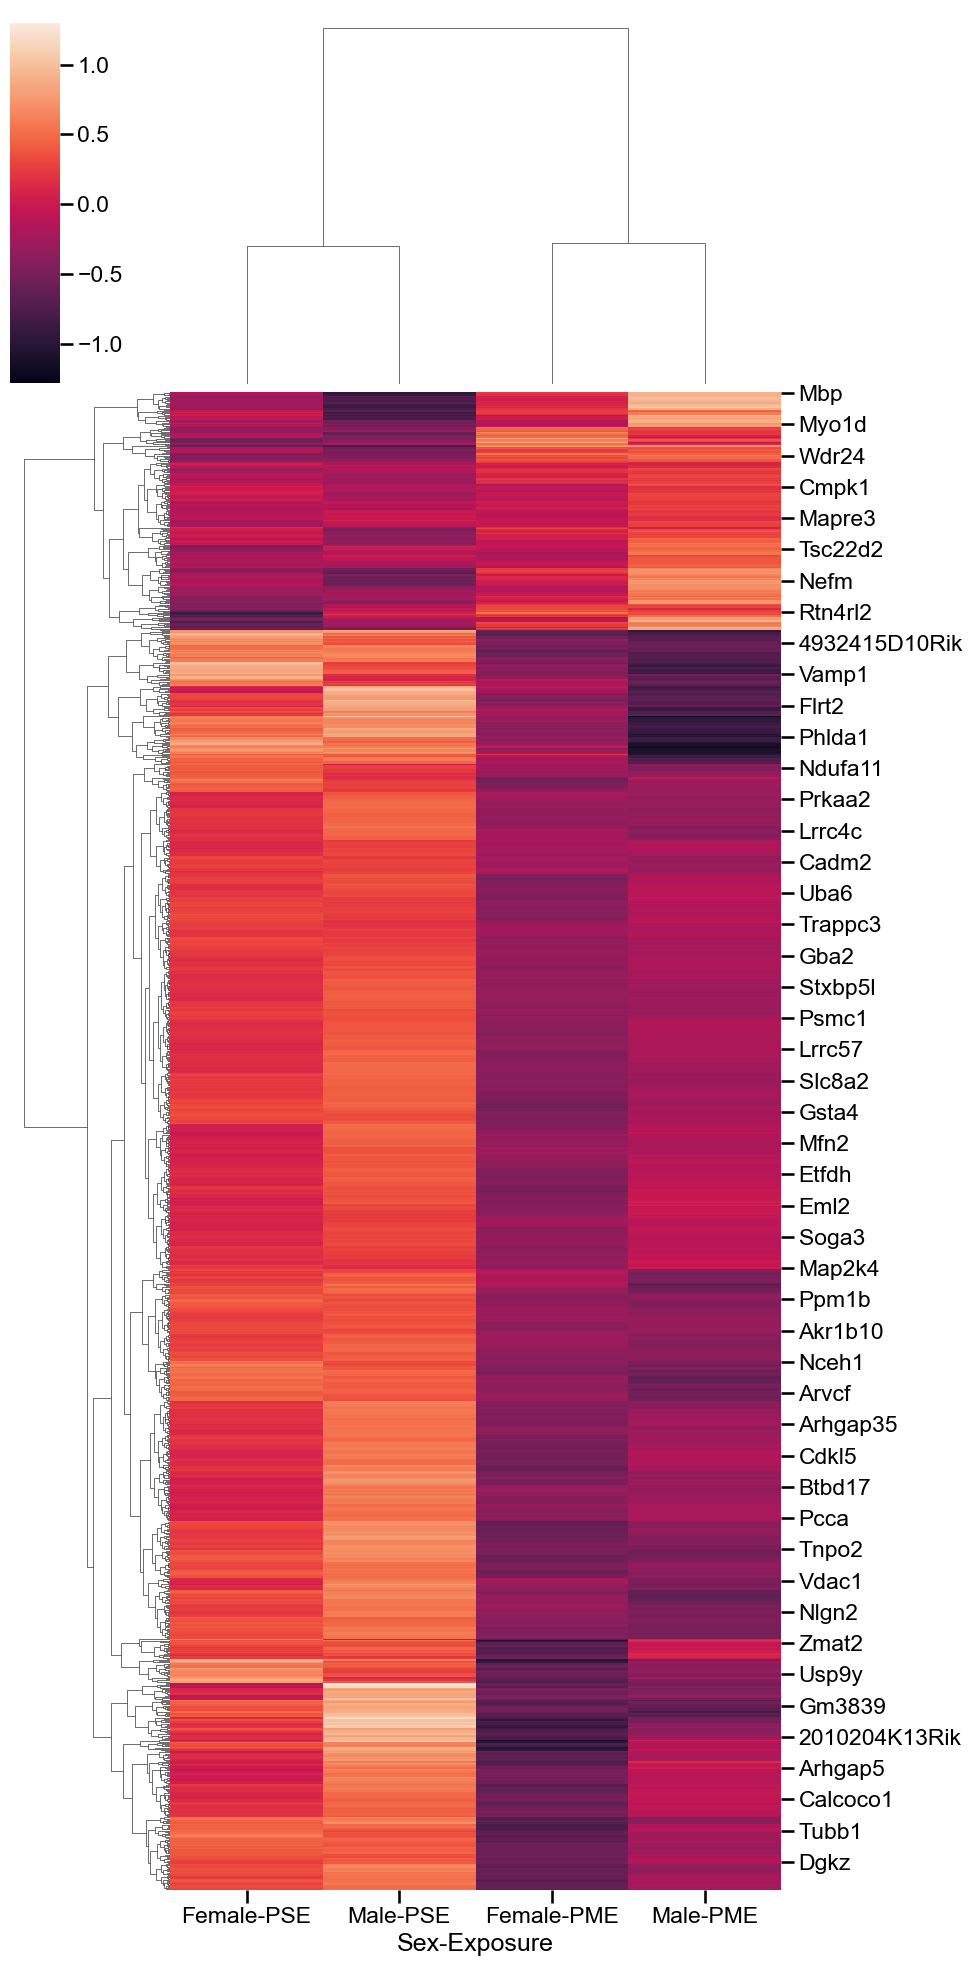

In [46]:
#hm = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Mset_Global_treatmentonly.xlsx', sheet_name='Heat Map Pivot')
sns.clustermap(hm.groupby(["Sex","Exposure"]).mean().T, method='complete',
               row_cluster = True, robust = False, figsize=(10,20)).savefig("protein_cluster.png")

In [ ]:
sns.clustermap(hm.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("protein_cluster.pdf")

In [ ]:
#sns.clustermap(hm.groupby("Exposure").mean().T, robust = False, row_cluster=False, method='complete')

In [ ]:
sns.clustermap(hm.groupby(["ID"]).mean().T, method='complete', col_cluster=False, robust = False, figsize=(10,18)).savefig("protein_cluster_IND.pdf")

In [ ]:
hmp = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Msets_PhosphopeptideSummary.xlsx', sheet_name='Heat Map Pivot')
sns.clustermap(hmp.groupby(["Sex","Exposure"]).mean().T, method='complete',
               robust = False, figsize=(10,20)).savefig("phos_protein_cluster.pdf")

In [ ]:
sns.clustermap(hmp.groupby("ID").mean().T, robust = False, 
               col_cluster=False, method='complete',figsize=(10,18)).savefig("phos_protein_cluster_IND.pdf")

## GO Terms

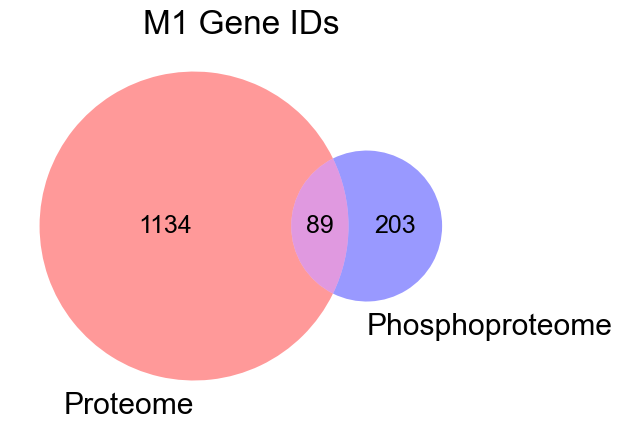

<Figure size 640x480 with 0 Axes>

In [3]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")

overlap = overlap.loc[overlap['Region'] == "M1"]

venn2([set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()), set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna())],
      set_labels = ('Proteome', 'Phosphoproteome'),
      set_colors=('red', 'blue'))

plt.title("M1 Gene IDs", size = 24)
plt.tight_layout()
#plt.savefig('M1_Geneoverlap.pdf', transparent = True, dpi = 300)
plt.show()
plt.clf()

In [10]:
#len(set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna())) #overlap
#len(set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()) - set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna())) # only protein
#len(set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna()) - set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna())) # only phosphoprotein

203

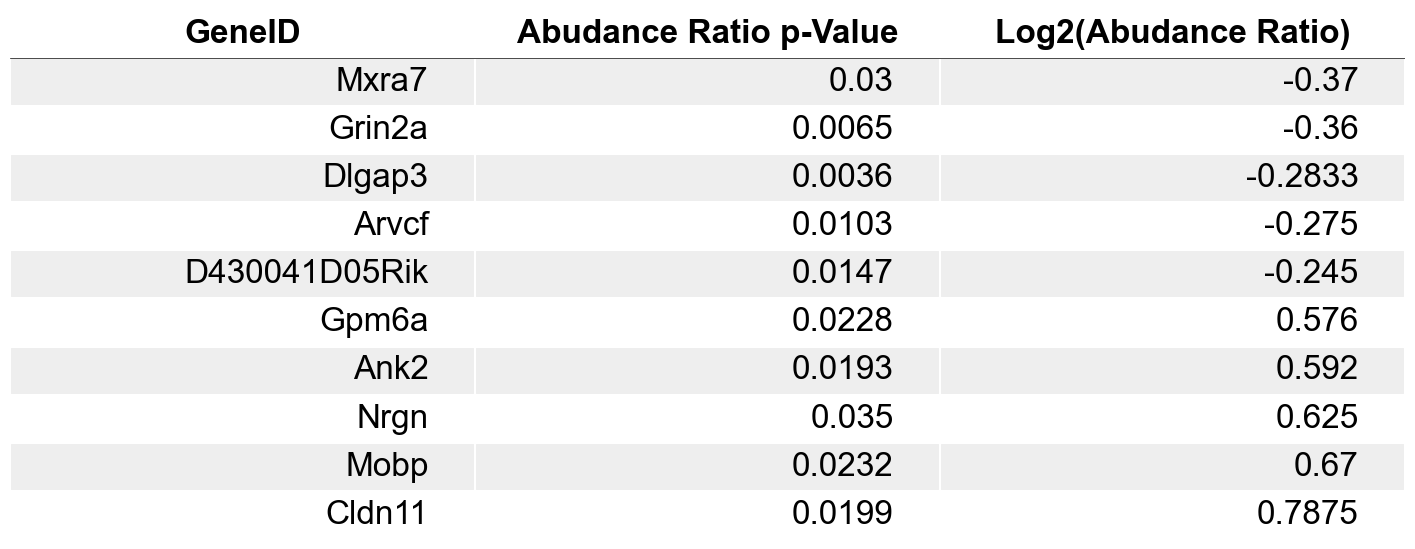

In [15]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna()) ## Overlap

test1 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).head()
test2 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).tail()

genes = pd.concat([test1,test2])

genes.columns = ['Abudance Ratio p-Value','Log2(Abudance Ratio)']

genes = genes.reset_index()

fig,ax = render_mpl_table(genes.round(4), header_columns=0, col_width=6.0)

plt.plot([0,1],[1-1/(genes.shape[0]+1),1-1/(genes.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1genes_Overlap.pdf')

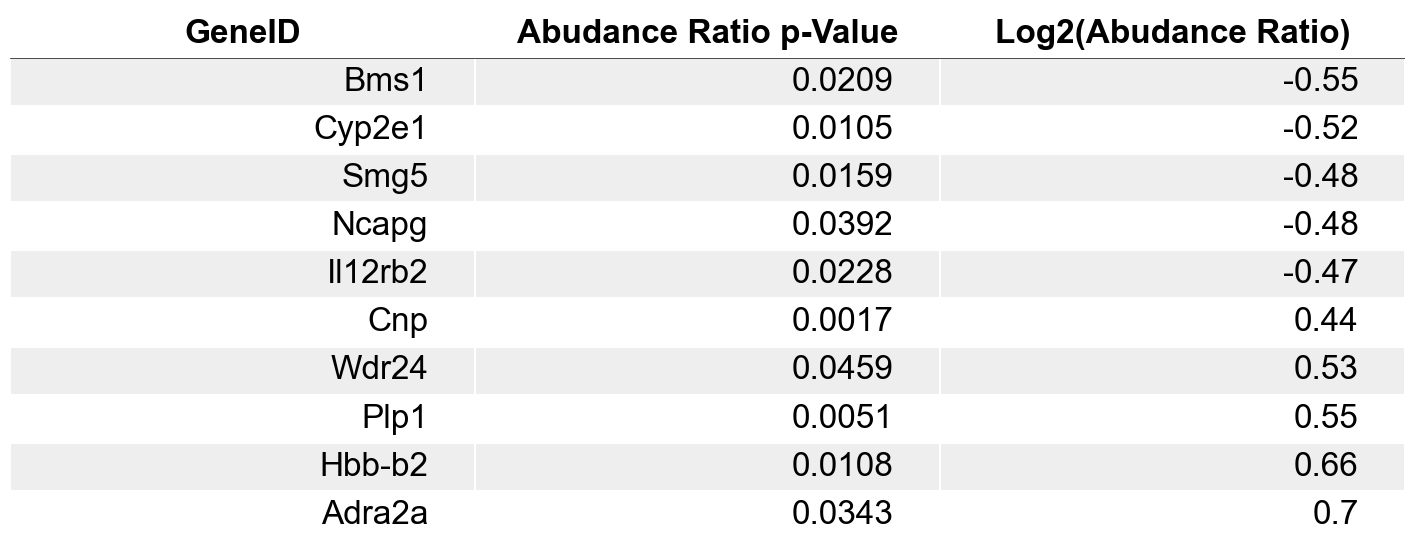

In [16]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()) - set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna()) # only protein

test1 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).head()
test2 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).tail()

genes = pd.concat([test1,test2])

genes.columns = ['Abudance Ratio p-Value','Log2(Abudance Ratio)']

genes = genes.reset_index()

fig,ax = render_mpl_table(genes.round(4), header_columns=0, col_width=6.0)

plt.plot([0,1],[1-1/(genes.shape[0]+1),1-1/(genes.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1genes_OnlyProtein.pdf')

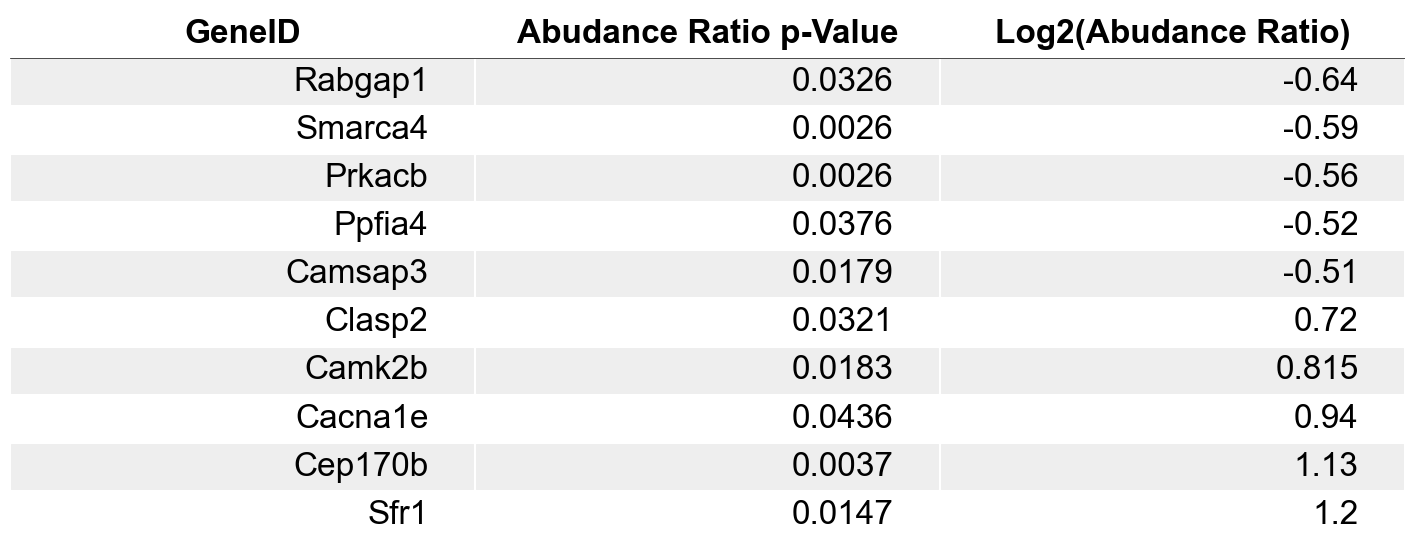

In [17]:
list = set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "GeneID"].dropna()) - set(overlap.loc[overlap['Type'] == 'Peptide', "GeneID"].dropna()) # only phosphopeptide

test1 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).head()
test2 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).tail()

genes = pd.concat([test1,test2])

genes.columns = ['Abudance Ratio p-Value','Log2(Abudance Ratio)']

genes = genes.reset_index()

fig,ax = render_mpl_table(genes.round(4), header_columns=0, col_width=6.0)

plt.plot([0,1],[1-1/(genes.shape[0]+1),1-1/(genes.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1genes_OnlyPhospho.pdf')

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Process")
overlap = overlap.loc[overlap['Region'] == "M1"]

venn2([set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()), set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())],
      set_labels = ('Proteome', 'Phosphoproteome'),
      set_colors=('red', 'blue'))

plt.title("M1 GO Process", size = 24)
plt.tight_layout()
plt.savefig('M1_GO Process.pdf', transparent = True, dpi = 300)
plt.show()
plt.clf()

In [ ]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head().reset_index()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(df.shape[0]+1),1-1/(df.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1_GO_List.svg')

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Function")
overlap = overlap.loc[overlap['Region'] == "M1"]

venn2([set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()), set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())],
      set_labels = ('Proteome', 'Phosphoproteome'),
      set_colors=('red', 'blue'))

plt.title("M1 GO Function", size = 24)
plt.tight_layout()
plt.savefig('M1_GO Function.pdf', transparent = True, dpi = 300)
plt.show()
plt.clf()

In [ ]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(8).head().reset_index()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(df.shape[0]+1),1-1/(df.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1_GO_FXN_List.svg')

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="KEGG")
overlap = overlap.loc[overlap['Region'] == "M1"]

venn2([set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()), set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())],
      set_labels = ('Proteome', 'Phosphoproteome'),
      set_colors=('red', 'blue'))

plt.title("M1 KEGG", size = 24)
plt.tight_layout()
plt.savefig('M1_KEGG.pdf', transparent = True, dpi = 300)
plt.show()
plt.clf()

In [ ]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head().reset_index()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(df.shape[0]+1),1-1/(df.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1_KEGG_List.svg')

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Reactome")

venn2([set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()), set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())],
      set_labels = ('Proteome', 'Phosphoproteome'),
      set_colors=('red', 'blue'))

plt.title("M1 Reactome", size = 24)
plt.tight_layout()
plt.savefig('M1_Reactome.pdf', transparent = True, dpi = 300)
plt.show()
plt.clf()

In [ ]:
list = set(overlap.loc[overlap['Type'] == 'Peptide', "termID"].dropna()) & set(overlap.loc[overlap['Type'] == 'Phosphopeptide', "termID"].dropna())

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(df.shape[0]+1),1-1/(df.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('M1_Reactome_List.svg')

# DMS

In [ ]:
DMS_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DMSset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, DMS) / (PSE, DMS)"
AR_log2 = "Abundance Ratio (log2): (PME, DMS) / (PSE, DMS)"
negativelogP = "Negative log(AR p-Value)"

DMS_P.loc[DMS_P[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
DMS_P.loc[(DMS_P[AR_Pvalue] < 0.05) & (DMS_P[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
DMS_P.loc[(DMS_P[AR_Pvalue] < 0.05) & (DMS_P[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = DMS_P, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("DMS Proteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 4)
plt.xlim(-.81,.81)

plt.vlines(x = 0, ymin = -0.2, ymax = 3.8, colors='Black', linestyles='dashed')
plt.hlines(y = (DMS_P.loc[DMS_P['Sig'] == "Non-Significant", negativelogP].max()),
           xmin = -.71, xmax = .71, colors='Black', linestyles='dashed')


plt.savefig('DMS_Volcano_Protein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
DMS_P.shape

In [ ]:
len(DMS_P.loc[DMS_P['Sig'] == "Up-Regulated"])

In [ ]:
len(DMS_P.loc[DMS_P['Sig'] == "Down-Regulated"])

In [ ]:
DMS_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DMSset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(DMS_P.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("DMS_protein_cluster.pdf")

In [ ]:
DMS_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DMSset_PhosphopeptideSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, DMS) / (PSE, DMS)"
AR_log2 = "Abundance Ratio (log2): (PME, DMS) / (PSE, DMS)"
negativelogP = "Negative log(AR p-Value)"

DMS_PP.loc[DMS_PP[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
DMS_PP.loc[(DMS_PP[AR_Pvalue] < 0.05) & (DMS_PP[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
DMS_PP.loc[(DMS_PP[AR_Pvalue] < 0.05) & (DMS_PP[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = DMS_PP, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("DMS Phosphoproteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 5)
plt.xlim(-1.2,1.2)

plt.vlines(x = 0, ymin = -0.2, ymax = 4.8, colors='Black', linestyles='dashed')
plt.hlines(y = (DMS_PP.loc[DMS_PP['Sig'] == "Non-Significant", negativelogP].max()), xmin = -1.1, xmax = 1.1, colors='Black', linestyles='dashed')


plt.savefig('DMS_Volcano_PHOSPOProtein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
DMS_PP.shape

In [ ]:
len(DMS_PP.loc[DMS_PP['Sig'] != "Non-Significant"])

In [ ]:
DMS_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DMSset_PhosphopeptideSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(DMS_PP.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("DMS_PHOSPHOprotein_cluster.pdf")

# DLS

In [ ]:
DLS_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DLSset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, DLS) / (PSE, DLS)"
AR_log2 = "Abundance Ratio (log2): (PME, DLS) / (PSE, DLS)"
negativelogP = "Negative log(AR p-Value)"

DLS_P.loc[DLS_P[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
DLS_P.loc[(DLS_P[AR_Pvalue] < 0.05) & (DLS_P[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
DLS_P.loc[(DLS_P[AR_Pvalue] < 0.05) & (DLS_P[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = DLS_P, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("DLS Proteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 4)
plt.xlim(-.81,.81)

plt.vlines(x = 0, ymin = -0.2, ymax = 3.8, colors='Black', linestyles='dashed')
plt.hlines(y = (DLS_P.loc[DLS_P['Sig'] == "Non-Significant", negativelogP].max()),
           xmin = -.71, xmax = .71, colors='Black', linestyles='dashed')


plt.savefig('DLS_Volcano_Protein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
DLS_P.shape

In [ ]:
len(DLS_P.loc[DLS_P['Sig'] != "Non-Significant"])

In [ ]:
DLS_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DLSset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(DLS_P.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("DLS_protein_cluster.pdf")

In [ ]:
DLS_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DLSset_PhosphopeptideSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, DLS) / (PSE, DLS)"
AR_log2 = "Abundance Ratio (log2): (PME, DLS) / (PSE, DLS)"
negativelogP = "Negative log(AR p-Value)"

DLS_PP.loc[DLS_PP[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
DLS_PP.loc[(DLS_PP[AR_Pvalue] < 0.05) & (DLS_PP[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
DLS_PP.loc[(DLS_PP[AR_Pvalue] < 0.05) & (DLS_PP[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = DLS_PP, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("DLS Phosphoproteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 5)
plt.xlim(-1.5,2.0)

plt.vlines(x = 0, ymin = -0.2, ymax = 4.8, colors='Black', linestyles='dashed')
plt.hlines(y = (DLS_PP.loc[DLS_PP['Sig'] == "Non-Significant", negativelogP].max()), xmin = -1.4, xmax = 1.9, colors='Black', linestyles='dashed')


plt.savefig('DLS_Volcano_PHOSPOProtein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
DLS_PP.shape

In [ ]:
len(DLS_PP.loc[DLS_PP['Sig'] != "Non-Significant"])

In [ ]:
DLS_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_DLSset_PhosphopeptideSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(DLS_PP.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("DLS_PHOSPHOprotein_cluster.pdf")

# Somatosensory Cortex

In [ ]:
S1_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Sset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, S1) / (PSE, S1)"
AR_log2 = "Abundance Ratio (log2): (PME, S1) / (PSE, S1)"
negativelogP = "Negative log(AR p-Value)"

S1_P.loc[S1_P[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
S1_P.loc[(S1_P[AR_Pvalue] < 0.05) & (S1_P[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
S1_P.loc[(S1_P[AR_Pvalue] < 0.05) & (S1_P[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = S1_P, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("S1 Proteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 4)
plt.xlim(-2.25,1.25)

plt.vlines(x = 0, ymin = -0.2, ymax = 3.8, colors='Black', linestyles='dashed')
plt.hlines(y = (S1_P.loc[S1_P['Sig'] == "Non-Significant", negativelogP].max()),
           xmin = -2.15, xmax = 1.15, colors='Black', linestyles='dashed')


plt.savefig('S1_Volcano_Protein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
S1_P.shape

In [ ]:
len(S1_P.loc[S1_P['Sig'] != "Non-Significant"])

In [ ]:
S1_P = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Sset_Global_treatmentonly_ProteinSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(S1_P.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("S1_protein_cluster.pdf")

In [ ]:
S1_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Sset_PhosphopeptideSummary.xlsx', sheet_name='Cleaned')

## Make a volcano plot

AR_Pvalue = "Abundance Ratio P-Value: (PME, S1) / (PSE, S1)"
AR_log2 = "Abundance Ratio (log2): (PME, S1) / (PSE, S1)"
negativelogP = "Negative log(AR p-Value)"

S1_PP.loc[S1_PP[AR_Pvalue] >= 0.05, 'Sig'] = "Non-Significant"
S1_PP.loc[(S1_PP[AR_Pvalue] < 0.05) & (S1_PP[AR_log2] <= 0), 'Sig'] = "Down-Regulated"
S1_PP.loc[(S1_PP[AR_Pvalue] < 0.05) & (S1_PP[AR_log2] > 0), 'Sig'] = "Up-Regulated"

f, ax = plt.subplots(figsize=(10,8))
sns.despine()

sns.scatterplot(data = S1_PP, y = negativelogP, x = AR_log2,
                hue = 'Sig', hue_order= ['Up-Regulated','Down-Regulated','Non-Significant'],
                linewidth = 0.0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], frameon=False, loc = "upper right")

plt.title("S1 Phosphoproteomics", size = 24)
plt.ylabel('-log(P value)')
plt.xlabel('Abundance Ratio (log2): PME/PSE')
plt.ylim(-.3, 4)
plt.xlim(-1.5,4.5)

plt.vlines(x = 0, ymin = -0.2, ymax = 3.8, colors='Black', linestyles='dashed')
plt.hlines(y = (S1_PP.loc[S1_PP['Sig'] == "Non-Significant", negativelogP].max()), xmin = -1.4, xmax = 4.4, colors='Black', linestyles='dashed')


plt.savefig('S1_Volcano_PHOSPOProtein.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
S1_PP.shape

In [ ]:
len(S1_PP.loc[S1_PP['Sig'] != "Non-Significant"])

In [ ]:
S1_PP = pd.read_excel('2020_10_155_Lumos_Atwood_Grecco_Sset_PhosphopeptideSummary.xlsx', sheet_name='HeatMap')

sns.clustermap(S1_PP.groupby(["Sex","Exposure"]).mean().T, method='complete', robust = False, figsize=(10,20)).savefig("S1_PHOSPHOprotein_cluster.pdf")

# Other Brain Regions v M1

In [49]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")
overlap

,Type,Region,GeneID,Abundance_pvalue,Abundance_Ratio_L2
0,Phosphopeptide,M1,Dnm1,0.000372,0.76
1,Phosphopeptide,M1,Slc4a4,0.000399,-0.41
2,Phosphopeptide,M1,Fam234b,0.000491,-0.49
3,Phosphopeptide,M1,Nefm,0.000672,0.57
4,Phosphopeptide,M1,Mag,0.000718,0.35
...,...,...,...,...,...
6338,Phosphopeptide,S1,Srrm2,0.048542,-0.41
6339,Phosphopeptide,S1,Rplp2,0.048742,-0.19
6340,Phosphopeptide,S1,Ralgapa1,0.049418,0.13
6341,Phosphopeptide,S1,Marcksl1,0.049917,-0.49


In [54]:
Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna()),
}

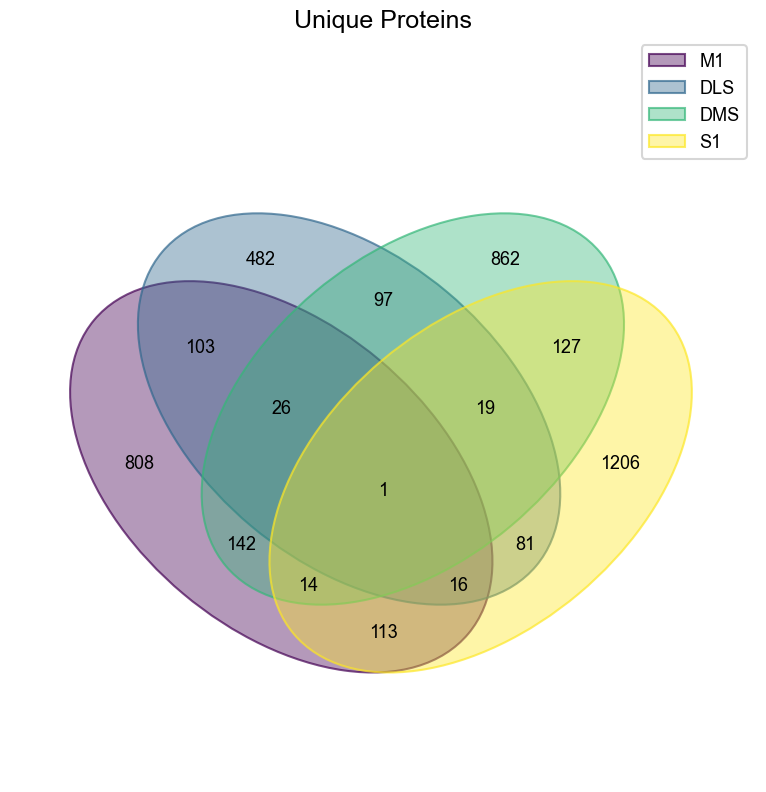

<Figure size 640x480 with 0 Axes>

In [62]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna()),
}

plt.title("Unique Proteins")

venn(Dict, ax = ax)

plt.savefig('UniqueProteins.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

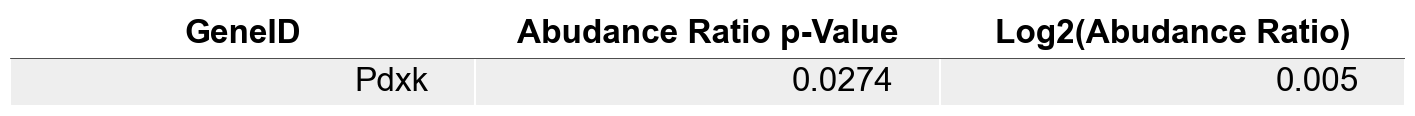

In [63]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna())
)

genes = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).head()

genes.columns = ['Abudance Ratio p-Value','Log2(Abudance Ratio)']

genes = genes.reset_index()

fig,ax = render_mpl_table(genes.round(4), header_columns=0, col_width=6.0)

plt.plot([0,1],[1-1/(genes.shape[0]+1),1-1/(genes.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('UniqueProteinOverlap.svg')

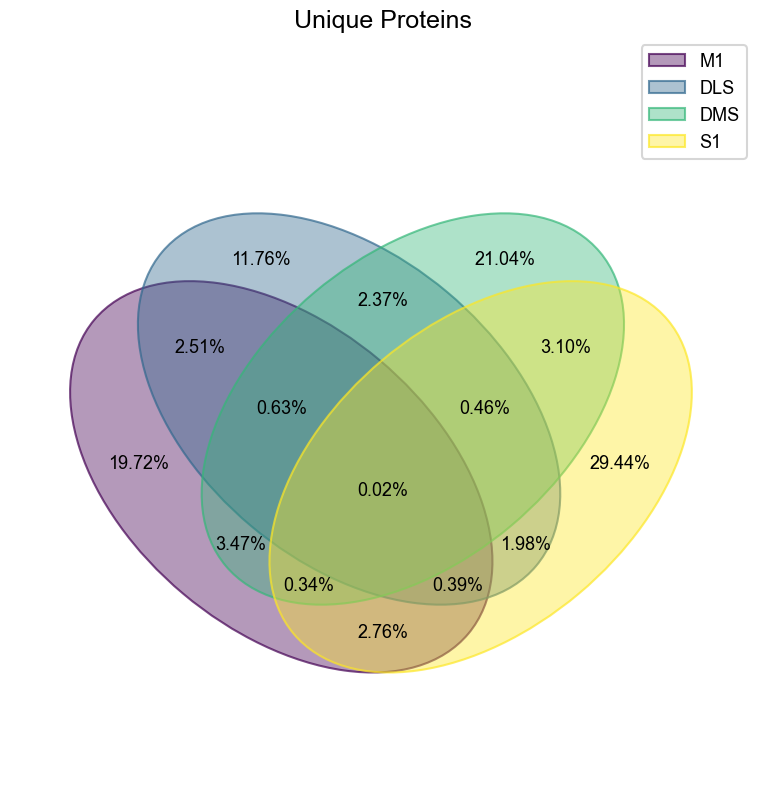

<Figure size 640x480 with 0 Axes>

In [68]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna()),
}

plt.title("Unique Proteins")

venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniqueProteinsPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

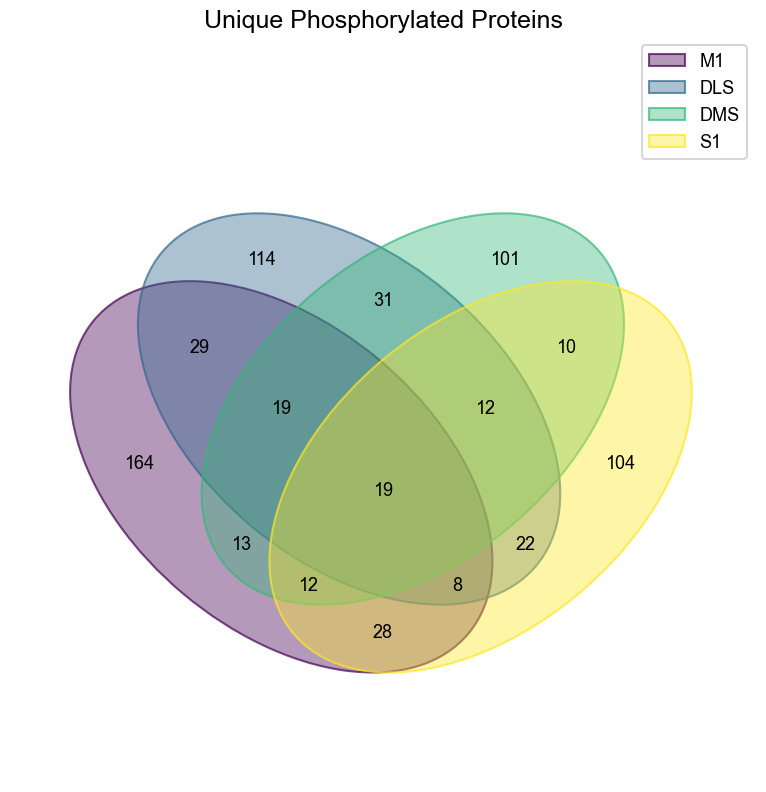

<Figure size 640x480 with 0 Axes>

In [69]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna()),
}

plt.title("Unique Phosphorylated Proteins")

venn(Dict, ax = ax)

plt.savefig('UniquePhosphoProteins.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

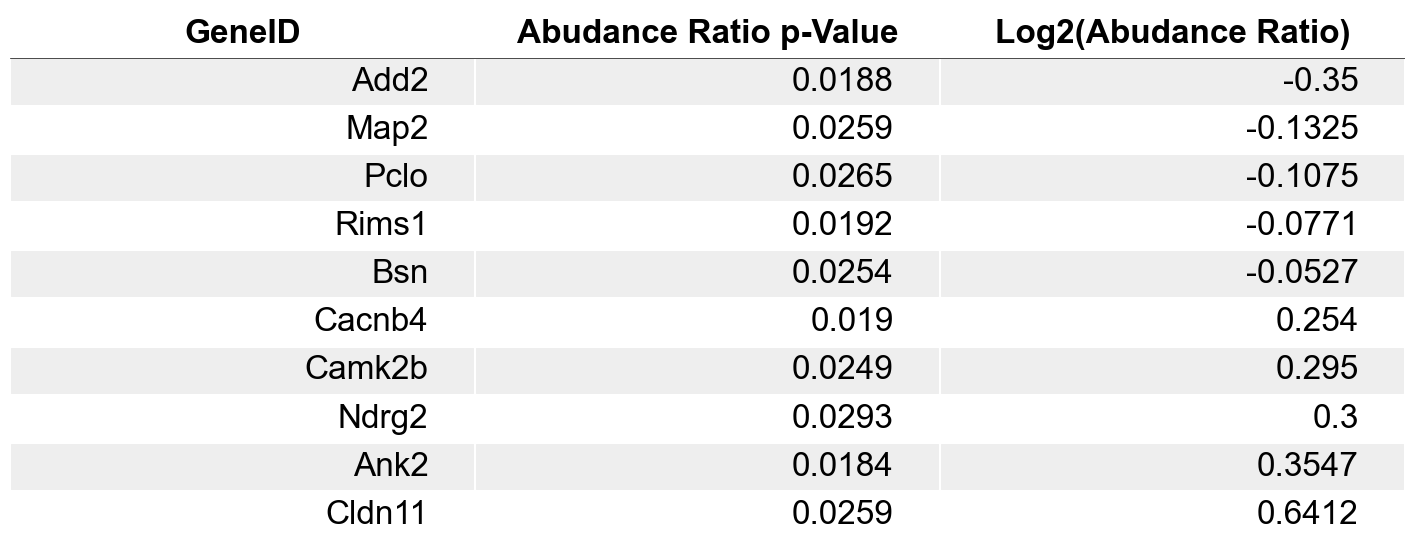

In [70]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna())
)

test1 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).head()
test2 = overlap[overlap.GeneID.isin(list)].groupby(['GeneID']).mean().sort_values(by=['Abundance_Ratio_L2']).tail()

genes = pd.concat([test1,test2])

genes.columns = ['Abudance Ratio p-Value','Log2(Abudance Ratio)']

genes = genes.reset_index()

fig,ax = render_mpl_table(genes.round(4), header_columns=0, col_width=6.0)

plt.plot([0,1],[1-1/(genes.shape[0]+1),1-1/(genes.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('uniquephosphoproteinoverlap.svg')

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Gene Overlap")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "GeneID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "GeneID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "GeneID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "GeneID"].dropna()),
}

plt.title("Unique Phosphorylated Proteins")

venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniquePhosphoProteinsPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

## GO Process

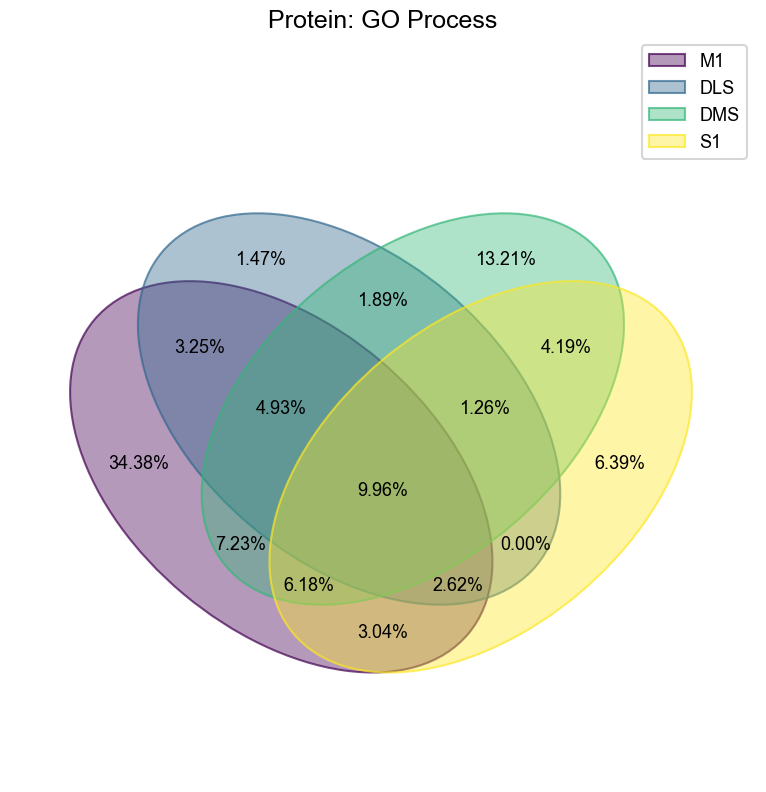

<Figure size 640x480 with 0 Axes>

In [75]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Process")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Protein: GO Process")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniqueGOProcessPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

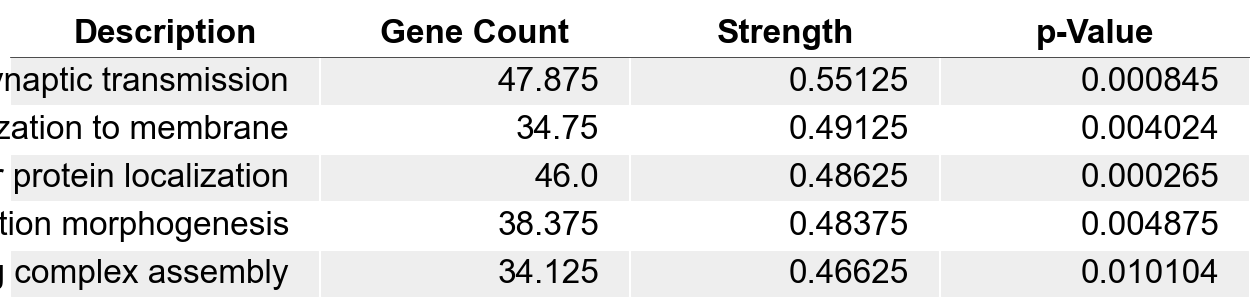

In [73]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_Protein_GO_process.svg')

In [80]:
Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

Not_M1

{'GO:0000902',
 'GO:0000904',
 'GO:0006139',
 'GO:0006464',
 'GO:0006605',
 'GO:0006725',
 'GO:0006793',
 'GO:0006807',
 'GO:0006810',
 'GO:0006886',
 'GO:0006996',
 'GO:0007005',
 'GO:0007399',
 'GO:0008104',
 'GO:0008152',
 'GO:0009056',
 'GO:0009892',
 'GO:0009894',
 'GO:0009966',
 'GO:0009987',
 'GO:0010646',
 'GO:0015031',
 'GO:0016043',
 'GO:0016192',
 'GO:0019220',
 'GO:0019222',
 'GO:0019538',
 'GO:0022008',
 'GO:0022604',
 'GO:0022607',
 'GO:0022613',
 'GO:0023051',
 'GO:0030182',
 'GO:0031175',
 'GO:0031323',
 'GO:0031329',
 'GO:0031399',
 'GO:0031400',
 'GO:0032268',
 'GO:0032269',
 'GO:0032879',
 'GO:0032880',
 'GO:0032989',
 'GO:0032990',
 'GO:0033036',
 'GO:0033043',
 'GO:0033365',
 'GO:0034613',
 'GO:0034641',
 'GO:0035556',
 'GO:0042325',
 'GO:0043170',
 'GO:0043254',
 'GO:0043412',
 'GO:0044085',
 'GO:0044087',
 'GO:0044093',
 'GO:0044237',
 'GO:0044238',
 'GO:0044248',
 'GO:0044260',
 'GO:0044267',
 'GO:0045184',
 'GO:0045936',
 'GO:0046483',
 'GO:0046907',
 'GO:00485

In [82]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

0.3514158652997443

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Process")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Phosphorylated Protein: GO Process")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniquePhosphoGOProcessPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_PhospoProtein_GO_process.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

## GO Fxn

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Function")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Protein: GO Function")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniqueGOFxnPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_Protein_GO_Fxn.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="GO Function")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Phosphorylated Protein: GO Function")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniquePhosphoGOFxnPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_PhospoProtein_GO_Fxn.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

## KEGG

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="KEGG")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    #"S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),   
}

plt.title("Protein: KEGG")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

#plt.savefig('UniqueKEGGPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_Protein_KEGG.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    #& set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="KEGG")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Phosphorylated Protein: KEGG")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniquePhosphoKEGGPERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_PhospoProtein_KEGG.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

## Reactome

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Reactome")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Protein: Reactome")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniqueReactomePERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_Protein_Reactome.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Peptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)

In [ ]:
overlap = pd.read_excel('M1_GO.xlsx', sheet_name="Reactome")

f, ax = plt.subplots(figsize=(8,12))

Dict = {
    "M1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna()),
    "DLS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna()),
    "DMS": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna()),
    "S1": set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna()),
}

plt.title("Phosphorylated Protein: Reactome")

#venn(Dict, ax = ax)
venn(Dict, fmt="{percentage:.2f}%", ax = ax)

plt.savefig('UniquePhosphoReactomePERCENT.pdf', transparent = True, dpi = 300)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
list = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

list = overlap[overlap.termID.isin(list)].groupby(['termID','termdescription']).mean().sort_values(by=['strength'], ascending=False).round(6).head()
list = list.reset_index()
list = list[['termdescription','observed gene count','strength','false discovery rate']]
list.columns = ['Description', 'Gene Count', 'Strength', 'p-Value']

list

fig,ax = render_mpl_table(list, header_columns=0, col_width=4.0)

plt.plot([0,1],[1-1/(list.shape[0]+1),1-1/(list.shape[0]+1)], c='black', lw=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('Global_PhospoProtein_Reactome.svg')

In [ ]:
from collections import Counter
import math

Not_M1 = (
    set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DLS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'DMS'), "termID"].dropna())
    & set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'S1'), "termID"].dropna())
)

M1 = set(overlap.loc[(overlap['Type'] == 'Phosphopeptide') & (overlap['Region'] == 'M1'), "termID"].dropna())

M1 = Counter(M1)
Not_M1 = Counter(Not_M1)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counter_cosine_similarity(M1, Not_M1)